## Setup
Import relevant libraries and read original data

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import Imputer 
import sklearn.cross_validation as cross
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

c:\program files\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
crime_data = pandas.read_csv('crime_prep.csv.gz')

## Support functions and constants

In [3]:
#constants
RANDOM_SEED = 42
TEST_SPLIT = 0.3
TOL = 1e-5
MAX_ITER = 1e5

## Data exploration

In [4]:
#What is the size of the dataset?
len(crime_data)

1994

In [5]:
#What does it look like at first glance?
crime_data.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.67,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,0.43,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,0.12,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,0.03,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN


At a glance we can already see that some columns have missing data.

In [6]:
#Is there missing data at the target?
sum(crime_data['target'].isnull())

0

At least all rows have the target value.

In [7]:
#What are the contents of each column?
for c in crime_data.columns:
    print(c)
    if 'cat' in c:
        print(sorted(crime_data[c].unique()),end='\n\n')
    else:    
        print(crime_data.loc[:,c].describe(),end='\n\n')

target
count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: target, dtype: float64

v_cont_0
count    1994.000000
mean       28.683551
std        16.397553
min         1.000000
25%        12.000000
50%        34.000000
75%        42.000000
max        56.000000
Name: v_cont_0, dtype: float64

v_cat_0
[nan, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0, 21.0, 23.0, 25.0, 27.0, 29.0, 31.0, 33.0, 35.0, 37.0, 39.0, 41.0, 43.0, 45.0, 49.0, 53.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 67.0, 69.0, 71.0, 73.0, 75.0, 77.0, 79.0, 81.0, 85.0, 87.0, 89.0, 91.0, 93.0, 95.0, 97.0, 99.0, 101.0, 103.0, 105.0, 107.0, 109.0, 111.0, 113.0, 117.0, 119.0, 121.0, 123.0, 125.0, 127.0, 129.0, 131.0, 133.0, 135.0, 139.0, 141.0, 143.0, 145.0, 147.0, 151.0, 153.0, 155.0, 157.0, 163.0, 165.0, 167.0, 169.0, 173.0, 181.0, 187.0, 193.0, 215.0, 510.0, 550.0, 570.0, 590.0, 630.0, 650.0, 660.0, 6

count    1994.000000
mean        0.495687
std         0.178071
min         0.000000
25%         0.370000
50%         0.480000
75%         0.620000
max         1.000000
Name: v_cont_20, dtype: float64

v_cont_21
count    1994.000000
mean        0.471133
std         0.173619
min         0.000000
25%         0.350000
50%         0.475000
75%         0.580000
max         1.000000
Name: v_cont_21, dtype: float64

v_cont_22
count    1994.000000
mean        0.317778
std         0.222137
min         0.000000
25%         0.142500
50%         0.260000
75%         0.440000
max         1.000000
Name: v_cont_22, dtype: float64

v_cont_23
count    1994.000000
mean        0.479248
std         0.167564
min         0.000000
25%         0.360000
50%         0.470000
75%         0.580000
max         1.000000
Name: v_cont_23, dtype: float64

v_cont_24
count    1994.000000
mean        0.375677
std         0.198257
min         0.000000
25%         0.230000
50%         0.330000
75%         0.480000
max      

Name: v_cont_58, dtype: float64

v_cont_59
count    1994.000000
mean        0.399077
std         0.201498
min         0.000000
25%         0.250000
50%         0.390000
75%         0.530000
max         1.000000
Name: v_cont_59, dtype: float64

v_cont_60
count    1994.000000
mean        0.427879
std         0.194970
min         0.000000
25%         0.280000
50%         0.430000
75%         0.560000
max         1.000000
Name: v_cont_60, dtype: float64

v_cont_61
count    1994.000000
mean        0.181364
std         0.235792
min         0.000000
25%         0.030000
50%         0.090000
75%         0.230000
max         1.000000
Name: v_cont_61, dtype: float64

v_cont_62
count    1994.000000
mean        0.182126
std         0.236333
min         0.000000
25%         0.030000
50%         0.080000
75%         0.230000
max         1.000000
Name: v_cont_62, dtype: float64

v_cont_63
count    1994.000000
mean        0.184774
std         0.236739
min         0.000000
25%         0.030000
50%     

Name: v_cont_98, dtype: float64

v_cont_99
count    1994.000000
mean        0.626424
std         0.200521
min         0.000000
25%         0.520000
50%         0.670000
75%         0.770000
max         1.000000
Name: v_cont_99, dtype: float64

v_cont_100
count    1994.000000
mean        0.651530
std         0.198221
min         0.000000
25%         0.560000
50%         0.700000
75%         0.790000
max         1.000000
Name: v_cont_100, dtype: float64

v_cont_101
count    319.000000
mean       0.069655
std        0.138238
min        0.000000
25%        0.010000
50%        0.020000
75%        0.060000
max        1.000000
Name: v_cont_101, dtype: float64

v_cont_102
count    319.000000
mean       0.217461
std        0.159928
min        0.000000
25%        0.130000
50%        0.180000
75%        0.250000
max        1.000000
Name: v_cont_102, dtype: float64

v_cont_103
count    319.000000
mean       0.924734
std        0.132249
min        0.000000
25%        0.930000
50%        0.970000
75

It appears that all continuous value columns (including *target*) are normalized against the highest ranking value of that column, except for *v_cont_0*.

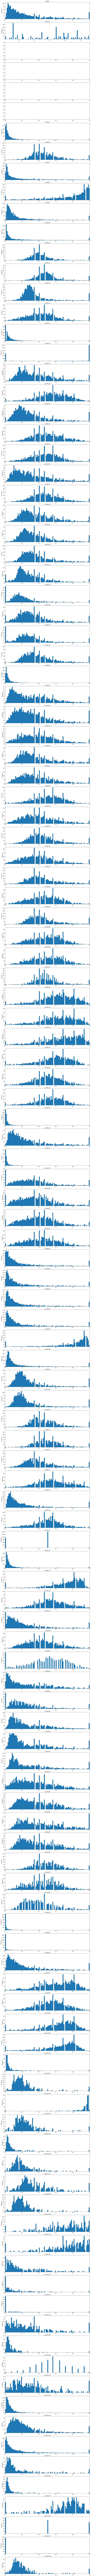

In [8]:
#What is the distribution of each variable?
fig, axes = plt.subplots(nrows=len(crime_data.columns), ncols=1)
for i, c in enumerate(crime_data.columns):
    if 'cat' not in c:
        crime_data[c].plot(kind='hist', figsize=(16, 500), title=c,
                           ax=axes[i], bins=100,xlim=(crime_data[c].min(),crime_data[c].max()))

Without further domain knowledge on the variables, it is hard to take any further conclusion from the charts above...

## Dataset preparation

In [9]:
categorical_features = ['v_cat_0','v_cat_1','v_cat_2','v_cat_3']
one_hot_encoding = crime_data[['v_cont_0']]
for c in categorical_features:
    one_hot_encoding = one_hot_encoding.join(pandas.get_dummies(crime_data[c],prefix=c,dummy_na=True))

In [10]:
original_features = crime_data.columns[6:128]
work_data = one_hot_encoding.join(crime_data[original_features]).copy()

In [11]:
##Add target
work_data['target'] = crime_data['target'].copy()

In [12]:
work_data.head()

,v_cont_0,v_cat_0_1.0,v_cat_0_3.0,v_cat_0_5.0,v_cat_0_7.0,v_cat_0_9.0,v_cat_0_11.0,v_cat_0_13.0,v_cat_0_15.0,v_cat_0_17.0,...,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126,target
0,8,0,0,0,0,0,0,0,0,0,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,0,0,0,0,0,0,0,0,0,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,0,0,0,0,0,0,0,0,0,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,0,0,1,0,0,0,0,0,0,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,0,0,0,0,0,0,0,0,0,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [13]:
work_data.fillna(value=work_data.mean(),inplace=True)

In [14]:
#Split indexes into train and test
(train_index, test_index) = cross.train_test_split(work_data.index,test_size = TEST_SPLIT, random_state = RANDOM_SEED)

train_data = work_data.iloc[train_index]
test_data = work_data.iloc[test_index]

train_data.reset_index(inplace = True, drop = True)
test_data.reset_index(inplace = True, drop = True)

features = work_data.columns[0:-1]

## Models training and feature selection

#### Linear regression without regularization

In [15]:
#Fitting with all features
model_linear_full = LinearRegression()
model_linear_full.fit(train_data[features],numpy.ravel(train_data['target']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
#How does it generalize?
model_linear_full.score(test_data[features],numpy.ravel(test_data['target']))

-0.3411506996900633

Pretty bad, really... pruning features is unlikely to make it much better, but let's see below.

In [17]:
#Pruning features
linear_feature_selector_standard = SelectFromModel(model_linear_full, prefit=True, threshold='mean')
select_train_data_linear_standard = linear_feature_selector_standard.transform(train_data[features])
select_test_data_linear_standard = linear_feature_selector_standard.transform(test_data[features])
select_train_data_linear_standard.shape

(1395, 977)

Only 36% of the features have coefficients above the mean.

In [18]:
#Fitting with selected features
model_linear_select_standard = LinearRegression()
model_linear_select_standard.fit(select_train_data_linear_standard,numpy.ravel(train_data['target']))
model_linear_select_standard.score(select_test_data_linear_standard,numpy.ravel(test_data['target']))

-1.484614963228352e+23

Well, in terms of generalization... we can say it doesn't. How about more pruning?

In [47]:
#Pruning features
linear_feature_selector_5e1 = SelectFromModel(model_linear_full, prefit=True, threshold=5*1e-1)
select_train_data_linear_5e1 = linear_feature_selector_5e1.transform(train_data[features])
select_test_data_linear_5e1 = linear_feature_selector_5e1.transform(test_data[features])
select_train_data_linear_5e1.shape

(1395, 28)

In [48]:
#Fitting with selected features
model_linear_select_5e1 = LinearRegression()
model_linear_select_5e1.fit(select_train_data_linear_5e1,numpy.ravel(train_data['target']))
model_linear_select_5e1.score(select_test_data_linear_5e1,numpy.ravel(test_data['target']))

0.37589797368192834

It seems the model was heavily overfit before pruning!

#### Decision Tree regression

In [21]:
#Fitting with all features
model_tree_full = DecisionTreeRegressor(random_state=RANDOM_SEED,criterion='friedman_mse') #friedman_mse criterion proves more consistent than others
model_tree_full.fit(train_data[features],numpy.ravel(train_data['target']))

DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [22]:
#How does it generalize?
model_tree_full.score(test_data[features],numpy.ravel(test_data['target']))

0.3863140262017325

Much better initial R^2 score on generalization...

In [23]:
#Pruning features
tree_feature_selector_standard = SelectFromModel(model_tree_full, prefit=True)
select_train_data_tree_standard = tree_feature_selector_standard.transform(train_data[features])
select_test_data_tree_standard = tree_feature_selector_standard.transform(test_data[features])
select_train_data_tree_standard.shape

(1395, 109)

Only **4%** of the features were more relevant than average!!

In [24]:
#Fitting with selected features
model_tree_select_standard = DecisionTreeRegressor(random_state=RANDOM_SEED,criterion='friedman_mse')
model_tree_select_standard.fit(select_train_data_tree_standard,numpy.ravel(train_data['target']))
model_tree_select_standard.score(select_test_data_tree_standard,numpy.ravel(test_data['target']))

0.3811048171175894

Generalization is maintained with huge dimensionality reduction.

In [25]:
#Pruning features
tree_feature_selector_1e7 = SelectFromModel(model_tree_full, prefit=True, threshold=1e-7)
select_train_data_tree_1e7 = tree_feature_selector_1e7.transform(train_data[features])
select_test_data_tree_1e7 = tree_feature_selector_1e7.transform(test_data[features])
select_train_data_tree_1e7.shape

(1395, 167)

In [26]:
#Fitting with selected features
model_tree_select_1e7 = DecisionTreeRegressor(random_state=RANDOM_SEED,criterion='friedman_mse')
model_tree_select_1e7.fit(select_train_data_tree_1e7,numpy.ravel(train_data['target']))
model_tree_select_1e7.score(select_test_data_tree_1e7,numpy.ravel(test_data['target']))

0.3587338094309347

Generalization relatively close to initial training. Model doesn't benefit as much from pruning.

#### Random Forest

In [27]:
tune_parameters = {'n_estimators':[1,10,100,1000]}
model_forest = RandomForestRegressor(random_state=RANDOM_SEED,verbose=1)
cross_validation_forest = GridSearchCV(model_forest, tune_parameters, scoring='r2',return_train_score=True)
cross_validation_forest.fit(train_data[features], numpy.ravel(train_data['target']))
cross_validation_forest.cv_results_

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

{'mean_fit_time': array([ 0.15015618,  1.51585531,  9.11678592, 81.58203888]),
 'mean_score_time': array([0.01567713, 0.02035308, 0.02505644, 0.15381312]),
 'mean_test_score': array([0.34266208, 0.61797177, 0.65248814, 0.65687159]),
 'mean_train_score': array([0.73755538, 0.93513611, 0.95154103, 0.95373931]),
 'param_n_estimators': masked_array(data=[1, 10, 100, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 10},
  {'n_estimators': 100},
  {'n_estimators': 1000}],
 'rank_test_score': array([4, 3, 2, 1]),
 'split0_test_score': array([0.30238472, 0.63232016, 0.67281877, 0.67826226]),
 'split0_train_score': array([0.72714878, 0.93120778, 0.9501103 , 0.95243511]),
 'split1_test_score': array([0.45728166, 0.65371216, 0.67248957, 0.67667892]),
 'split1_train_score': array([0.72513239, 0.92909157, 0.94892863, 0.95158057]),
 'split2_test_score': array([0.26831987, 0.56788299, 0.6121

In [28]:
#Fitting with all features
model_forest_full = RandomForestRegressor(random_state=RANDOM_SEED,criterion='friedman_mse',
                                          n_estimators=100)
model_forest_full.fit(train_data[features],numpy.ravel(train_data['target']))

RandomForestRegressor(bootstrap=True, criterion='friedman_mse',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
#How does it generalize?
model_forest_full.score(test_data[features],numpy.ravel(test_data['target']))

0.6403428655595447

Initial R^2 score close to pruned linear regression model.

In [30]:
#Pruning features
forest_feature_selector_standard = SelectFromModel(model_forest_full, prefit=True)
select_train_data_forest_standard = forest_feature_selector_standard.transform(train_data[features])
select_test_data_forest_standard = forest_feature_selector_standard.transform(test_data[features])
select_train_data_forest_standard.shape

(1395, 148)

Only **5%** of the features were more relevant than average!!

In [31]:
#Fitting with selected features
model_forest_select_standard = RandomForestRegressor(random_state=RANDOM_SEED,criterion='friedman_mse',
                                                     n_estimators=100)
model_forest_select_standard.fit(select_train_data_forest_standard,numpy.ravel(train_data['target']))
model_forest_select_standard.score(select_test_data_forest_standard,numpy.ravel(test_data['target']))

0.6387296610236877

Similar generalization power, with huge dimensionality reduction.

In [32]:
#Pruning features
forest_feature_selector_1e8 = SelectFromModel(model_forest_full, prefit=True, threshold=1e-5)
select_train_data_forest_1e8 = forest_feature_selector_1e8.transform(train_data[features])
select_test_data_forest_1e8 = forest_feature_selector_1e8.transform(test_data[features])
select_train_data_forest_1e8.shape

(1395, 293)

In [33]:
#Fitting with selected features
model_forest_select_1e8 = RandomForestRegressor(random_state=RANDOM_SEED,criterion='friedman_mse',
                                                n_estimators=100)
model_forest_select_1e8.fit(select_train_data_forest_1e8,numpy.ravel(train_data['target']))
model_forest_select_1e8.score(select_test_data_forest_1e8,numpy.ravel(test_data['target']))

0.634937419920662

Generalization similar to initial fitting.

#### Ridge regression (linear + L2 norm regularization)

In [34]:
tune_parameters = {'alpha':[0.01,0.1,1,10,100]}
model_ridge = Ridge(random_state=RANDOM_SEED,tol=TOL,max_iter=MAX_ITER)
cross_validation_ridge = GridSearchCV(model_ridge, tune_parameters, scoring='r2',return_train_score=True)
cross_validation_ridge.fit(train_data[features], numpy.ravel(train_data['target']))
cross_validation_ridge.cv_results_

{'mean_fit_time': array([0.15088971, 0.13541738, 0.13276847, 0.12904112, 0.14419238]),
 'mean_score_time': array([0.01041516, 0.0052096 , 0.01041571, 0.00604272, 0.00675766]),
 'mean_test_score': array([0.45922197, 0.57114175, 0.62582631, 0.64601468, 0.62155065]),
 'mean_train_score': array([0.99978038, 0.99480089, 0.93508034, 0.75981141, 0.64917745]),
 'param_alpha': masked_array(data=[0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'rank_test_score': array([5, 4, 2, 1, 3]),
 'split0_test_score': array([0.53957825, 0.57946523, 0.622364  , 0.64490406, 0.61173115]),
 'split0_train_score': array([0.99987423, 0.99674724, 0.94031605, 0.76176716, 0.64887562]),
 'split1_test_score': array([0.39818749, 0.57810695, 0.65389292, 0.6660844 , 0.6366912 ]),
 'split1_train_score': array([0.99969474, 0.9926639 , 0.92826

In [35]:
#Fitting with all features
model_ridge_full = Ridge(random_state=RANDOM_SEED,tol=TOL,max_iter=MAX_ITER,alpha=10)
model_ridge_full.fit(train_data[features],numpy.ravel(train_data['target']))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=False, random_state=42, solver='auto', tol=1e-05)

In [36]:
#How does it generalize?
model_ridge_full.score(test_data[features],numpy.ravel(test_data['target']))

0.6429708540794649

Best generalization yet...

In [37]:
#Pruning features
ridge_feature_selector_standard = SelectFromModel(model_ridge_full, prefit=True)
select_train_data_ridge_standard = ridge_feature_selector_standard.transform(train_data[features])
select_test_data_ridge_standard = ridge_feature_selector_standard.transform(test_data[features])
select_train_data_ridge_standard.shape

(1395, 938)

In [38]:
#Fitting with selected features
model_ridge_select_standard = Ridge(random_state=RANDOM_SEED,tol=TOL,max_iter=MAX_ITER,alpha=10)
model_ridge_select_standard.fit(select_train_data_ridge_standard,numpy.ravel(train_data['target']))
model_ridge_select_standard.score(select_test_data_ridge_standard,numpy.ravel(test_data['target']))

0.6398662532574853

Slight generalization loss with 66% less features.

In [55]:
#Pruning features
ridge_feature_selector_manual = SelectFromModel(model_ridge_full, prefit=True, threshold=3*1e-2)
select_train_data_ridge_manual = ridge_feature_selector_manual.transform(train_data[features])
select_test_data_ridge_manual = ridge_feature_selector_manual.transform(test_data[features])
select_train_data_ridge_manual.shape

(1395, 85)

In [56]:
#Fitting with selected features
model_ridge_select_manual = Ridge(random_state=RANDOM_SEED,tol=TOL,max_iter=MAX_ITER,alpha=10)
model_ridge_select_manual.fit(select_train_data_ridge_manual,numpy.ravel(train_data['target']))
model_ridge_select_manual.score(select_test_data_ridge_manual,numpy.ravel(test_data['target']))

0.6327861763673842

Great generalization power with 78% feature reduction!

#### Choosing a model

From the results above, the **Ridge** model is clearly superior to the others, with predictive power at 0.64 R^2 rivalled only by the Random Forest, but achieving the results with only 3% of the features in the dataset.